In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from minisom import MiniSom

In [2]:
df = pd.read_csv(r'E:\P16-Self-Organizing-Maps\Credit_Card_Applications.csv')

In [3]:
df.shape

(690, 16)

In [4]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [5]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X = mm.fit_transform(X)

In [6]:
#SOM initialization
som = MiniSom(x=10,y=10,input_len=15, sigma=1, learning_rate=0.5)

In [7]:
#weight initialization
som.random_weights_init(X)
#training SOM
som.train_random(data=X, num_iteration=100)

In [8]:
#visualizing the results
#mit is the mean of distance of all the neurons from the winning node
from pylab import bone, pcolor, colorbar, plot, show

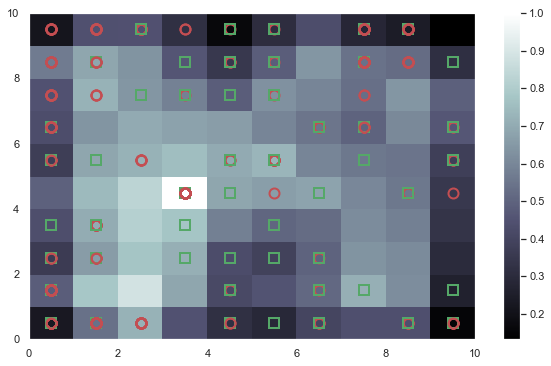

In [9]:
plt.figure(figsize=(10,6))
bone()
pcolor(som.distance_map().T) #return distances of all the winning node
colorbar() #will give legend of all colors
markers = ['o','s']
colors = ['r','g'] #red no approval, green got approval
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
        w[1] + 0.5,
        markers[y[i]],
        markeredgecolor = colors[y[i]],
        markerfacecolor = 'None',
        markersize = 10,
        markeredgewidth = 2)

In [10]:
#Finding the frauds
mappings = som.win_map(X)

In [14]:
frauds = mappings[(3,4)]

In [18]:
frauds = mm.inverse_transform(frauds)

In [22]:
#Going from unsupervised to Supervised Learning
#Creating the matrix of features
customers = df.iloc[:,1:].values

In [32]:
#Creating the dependent variable
is_fraud = np.zeros(len(df))
for i in range(len(df)):
    if df.iloc[i,0] in frauds:
        is_fraud[i] = 1

In [40]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [41]:
from keras.models import Sequential
from keras.layers import Dense

In [42]:
classifier = Sequential()

In [45]:
#adding layers
classifier.add(Dense(units=2, kernel_initializer='uniform', activation='relu', input_dim = 15))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(customers, is_fraud, batch_size=1, epochs=2)

#just 2 epochs as have only few sample and featues

Instructions for updating:
Use tf.cast instead.
Epoch 1/2
690/690 [==============================] - 1s 2ms/step - loss: 0.3531 - acc: 0.9478
Epoch 2/2
690/690 [==============================] - 1s 1ms/step - loss: 0.1192 - acc: 0.9478


In [46]:
#predicting the probabalities of frauds
y_pred = classifier.predict(customers)

In [50]:
y_pred = np.concatenate((df.iloc[:,0:1].values, y_pred), axis = 1)

In [52]:
y_pred[:5]

array([[1.57761560e+07, 6.34789467e-03],
       [1.57395480e+07, 2.30554521e-01],
       [1.56628540e+07, 6.11421168e-02],
       [1.56876880e+07, 1.35745704e-02],
       [1.57157500e+07, 1.09058619e-03]])

In [53]:
y_pred = y_pred[y_pred[:,1].argsort()] #will sort numpy array by column 1

In [62]:
np.set_printoptions(precision=0)
y_pred

array([[2.e+07, 3.e-05],
       [2.e+07, 3.e-04],
       [2.e+07, 3.e-04],
       ...,
       [2.e+07, 2.e-01],
       [2.e+07, 2.e-01],
       [2.e+07, 2.e-01]])